In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os

# Path ke folder utama di Google Drive
drive_path = '/content/drive/My Drive/'

# Nama folder utama
main_folder = 'data_sortir_split'

# Path ke folder train, val, dan test
train_folder = os.path.join(drive_path, main_folder, 'train')
val_folder = os.path.join(drive_path, main_folder, 'val')
test_folder = os.path.join(drive_path, main_folder, 'test')

# List file dan folder dalam setiap direktori
train_files = os.listdir(train_folder)
val_files = os.listdir(val_folder)
test_files = os.listdir(test_folder)

# Tampilkan isi folder
print(f"Isi folder 'train': {train_files}")
print(f"Isi folder 'val': {val_files}")
print(f"Isi folder 'test': {test_files}")

Isi folder 'train': ['Cassava___green_mottle', 'Cassava___mosaic_disease', 'Cassava___bacterial_blight', 'Cassava___healthy', 'Cassava___brown_streak_disease', 'Pythium Fruit Rot', 'Gummy Stem Blight', 'Fresh Leaf', 'Fresh Cucumber', 'Downy Mildew', 'Belly Rot', 'Bacterial Wilt', 'Anthracnose', 'Phytopthora', 'Healthy', 'Pest', 'Fungi', 'Virus', 'Nematode', 'Bacteria', 'Wilt Disease', 'Insect Pest Disease', 'Leaf Spot Disease', 'White Mold Disease', 'Healthy Leaf', 'Mosaic Virus Disease', 'Powdery_Mildew', 'Mosaic Disease', 'Bacterial Leaf Spot', 'LeafCurl', 'Yelowwiss', 'DaunSehat', 'Karat_Daun', 'Daun_Sehat', 'Bercak_Daun', 'Hawar_Daun', 'Insect Hole', 'Black Rot', 'Tomato___Leaf_Mold', 'Tomato___Late_blight', 'Tomato___healthy', 'Tomato___Target_Spot', 'Tomato___Early_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Bacterial_spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'BrownSpot', 'Tungro', 'Blas

In [ ]:
# Pengaturan generator data
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define data directories
train_dir = train_folder
validation_dir = val_folder
test_dir = test_folder

# Create ImageDataGenerator for training
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Create ImageDataGenerator for validation and testing (only rescaling)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size
batch_size = 32

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=True)

validation_generator = val_datagen.flow_from_directory(
    validation_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=(224, 224), batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 2192 images belonging to 52 classes.
Found 274 images belonging to 52 classes.
Found 276 images belonging to 52 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet

# Calculate the number of classes
num_classes = len(os.listdir(train_folder))

# Build the MobileNetV1 model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add Global Average Pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add Dense layer
predictions = Dense(num_classes, activation='softmax')(x)

# Combine the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Kompilasi model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

earlystop_callback = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

In [ ]:
# Pelatihan model
history = model.fit(
    train_generator,
    epochs=200,
    validation_data=validation_generator,
    callbacks=[earlystop_callback]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 1624s 23s/step - accuracy: 0.3817 - loss: 2.4082 - val_accuracy: 0.2226 - val_loss: 5.4913
Epoch 2/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.7288 - loss: 0.8502 - val_accuracy: 0.4270 - val_loss: 3.6491
Epoch 3/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.7599 - loss: 0.7215 - val_accuracy: 0.3723 - val_loss: 4.1766
Epoch 4/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8083 - loss: 0.5909 - val_accuracy: 0.5693 - val_loss: 2.0605
Epoch 5/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 144s 1s/step - accuracy: 0.8554 - loss: 0.4245 - val_accuracy: 0.6679 - val_loss: 1.1415
Epoch 6/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 95s 1s/step - accuracy: 0.8863 - loss: 0.3563 - val_accuracy: 0.6314 - val_loss: 1.5131
Epoch 7/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 105s 2s/step - accuracy: 0.8864 - loss: 0.3753 - val_accuracy: 0.7263 - val_loss: 1.1740
Epoch 8/200
69/69 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8960 - loss: 0.2980 - val_accuracy: 0.6

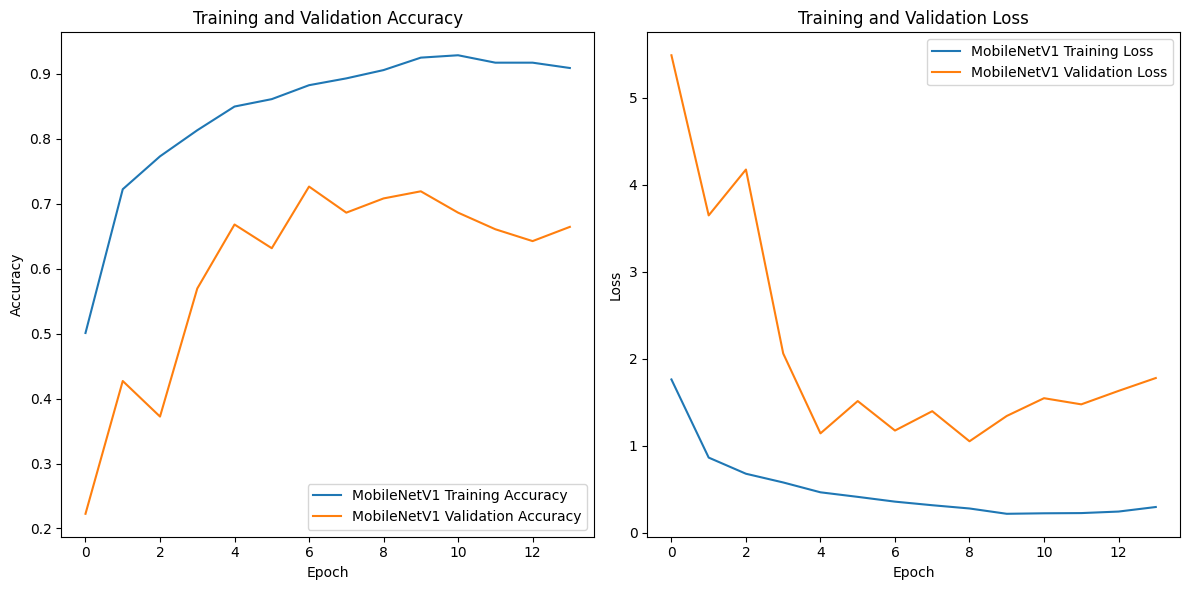

In [ ]:
# Extract training history for MobileNetV1
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='MobileNetV1 Training Accuracy')
plt.plot(history.history['val_accuracy'], label='MobileNetV1 Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='MobileNetV1 Training Loss')
plt.plot(history.history['val_loss'], label='MobileNetV1 Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


9/9 ━━━━━━━━━━━━━━━━━━━━ 125s 15s/step
Confusion Matrix
[[1 0 0 ... 0 0 0]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 5]]
Akurasi: 0.7536
Recall: 0.7519
Presisi: 0.7939
Skor F1: 0.7443

Laporan Klasifikasi:

                                               precision    recall  f1-score   support

                                  Anthracnose       0.50      0.20      0.29         5
                                     Bacteria       1.00      0.80      0.89         5
                          Bacterial Leaf Spot       1.00      0.80      0.89         5
                               Bacterial Wilt       1.00      0.40      0.57         5
                              BacterialBlight       1.00      1.00      1.00         5
                                    Belly Rot       1.00      0.60      0.75         5
                                  Bercak_Daun       1.00      1.00      1.00         6
                                    Black

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

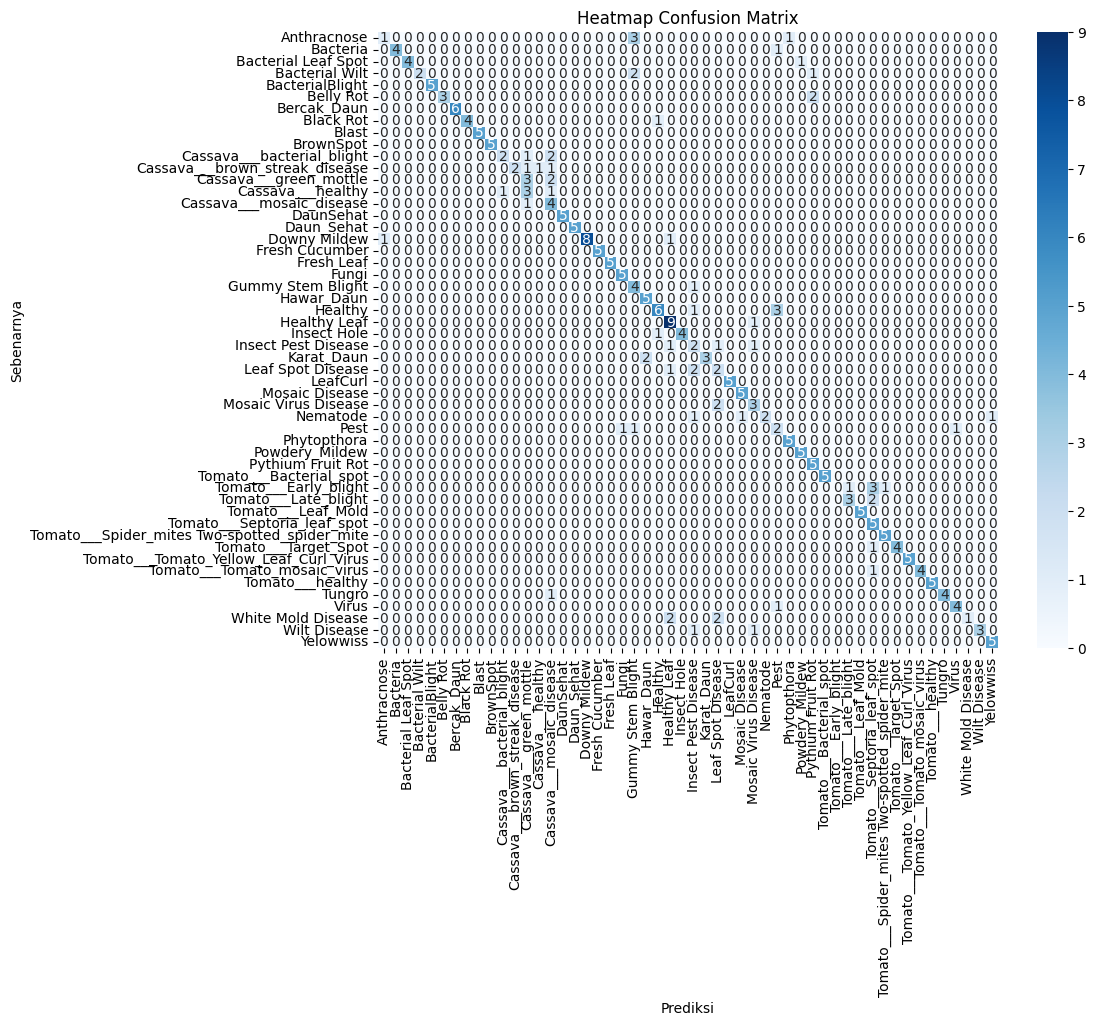

In [ ]:
# Evaluasi model
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Get the class labels from the test generator
class_labels = list(test_generator.class_indices.keys())

# Get the unique class indices present in the true_classes
unique_true_classes = np.unique(true_classes)

# Filter the class_labels to match the unique true classes
# We assume that the index in class_labels corresponds to the class index
filtered_class_labels = [class_labels[i] for i in unique_true_classes]


# Menghitung confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)
print('Confusion Matrix')
print(conf_matrix)

# Menghitung metrik evaluasi
accuracy = accuracy_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes, average='macro')
precision = precision_score(true_classes, predicted_classes, average='macro')
f1 = f1_score(true_classes, predicted_classes, average='macro')

print(f'Akurasi: {accuracy:.4f}')
print(f'Recall: {recall:.4f}')
print(f'Presisi: {precision:.4f}')
print(f'Skor F1: {f1:.4f}')

# Laporan klasifikasi untuk setiap kelas
print('\nLaporan Klasifikasi:\n')
# Use the filtered_class_labels for target_names
print(classification_report(true_classes, predicted_classes, target_names=filtered_class_labels))

# Mencetak nama setiap kelas
print("\nLabel Kelas yang Dievaluasi:")
# Use the filtered_class_labels
print(filtered_class_labels)

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(10, 8))
# Use filtered_class_labels for xticklabels and yticklabels in the heatmap
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=filtered_class_labels, yticklabels=filtered_class_labels)
plt.xlabel('Prediksi')
plt.ylabel('Sebenarnya')
plt.title('Heatmap Confusion Matrix')
plt.show()

In [ ]:
# Simpan model
model_save_path = '/content/drive/My Drive/final/final.h5'
model.save(model_save_path)
print(f" Model disimpan ke: {model_save_path}")

 Model disimpan ke: /content/drive/My Drive/final/final.h5


In [ ]:
import pickle

# Ambil label map dari generator
label_map = train_generator.class_indices  # dict: {'nama_kelas': angka}

# Simpan ke file .pkl
with open('/content/drive/My Drive/final/label_map.pkl', 'wb') as f:
    pickle.dump(label_map, f)

print("✅ label_map berhasil disimpan.")

✅ label_map berhasil disimpan.
